THIS CODE HAS SOME BASIC DATA MODELING OF BIOLOGICAL SYSTEMS

This is the basic model for a protein system cascade
dP0/dt= -r01 P0 + r10 P1
dP1/dt= r12 P1 + r21 P2 - r10 P1
dP2/dt= r12P1 - r21 P2

P0 with 2 terms, P1 with 4 terms and P2 with 2 terms


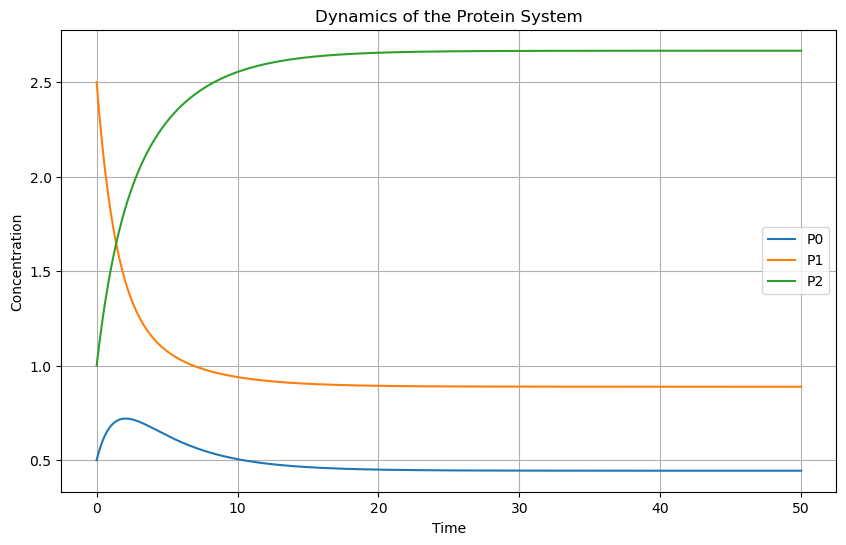

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the rate constants
r01 = 0.4
r12 = 0.3
r10 = 0.2
r21 = 0.1

# Define the system of differential equations
def protein_system(y, t, r01, r12, r10, r21):
    P0, P1, P2 = y
    dP0_dt = -r01 * P0 + r10 * P1
    dP1_dt = r01 * P0 - r12 * P1 + r21 * P2 - r10 * P1
    dP2_dt = r12 * P1 - r21 * P2
    return [dP0_dt, dP1_dt, dP2_dt]

# Time points
t = np.linspace(0, 50, 500)

# Initial conditions
P0_init = 1
P1_init = 1
P2_init = 1
initial_conditions = [2, 0.5, 0]

# Simulate the system
solution = odeint(protein_system, initial_conditions, t, args=(r01, r12, r10, r21))

# Extract results
P0 = solution[:, 0]
P1 = solution[:, 1]
P2 = solution[:, 2]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, P0, label='P0')
plt.plot(t, P1, label='P1')
plt.plot(t, P2, label='P2')
plt.title('Dynamics of the Protein System')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()


The above simulation reveals that initially, the concentrations of P0, P1 and P2 follow a dynamic balance governed by the rate constants.
 P0 concentration decreases over time due to phosphorylation into P1. Simultaneously, P1 accumulates initially as it is both phosphorylated from P0 and dephosphorylated back from P2.
Eventually, P2 begins to build up, but at a slower rate because it requires P1 to first accumulate to a significant level.
The model demonstrates that phosphorylation and dephosphorylation are highly interdependent. Increasing the rate of one process (e.g., phosphorylation) directly affects the dynamics of the other (e.g., dephosphorylation). Achieving a steady-state balance requires both processes to be in harmony. The system tends to a steady-state where the concentrations of P0, P1, and P2 stabilize. This reflects the biological reality that signaling pathways often reach equilibrium after an initial transient phase. Changing rate constants allows for control over how fast the signal (phosphorylation) propagates through the system. Higher phosphorylation rates lead to quicker signaling, whereas slower rates prolong the signaling duration.


INFECTIOUS DISEASE MODEL

S= susceptible people
I= infected people
R= recovered people/ immune

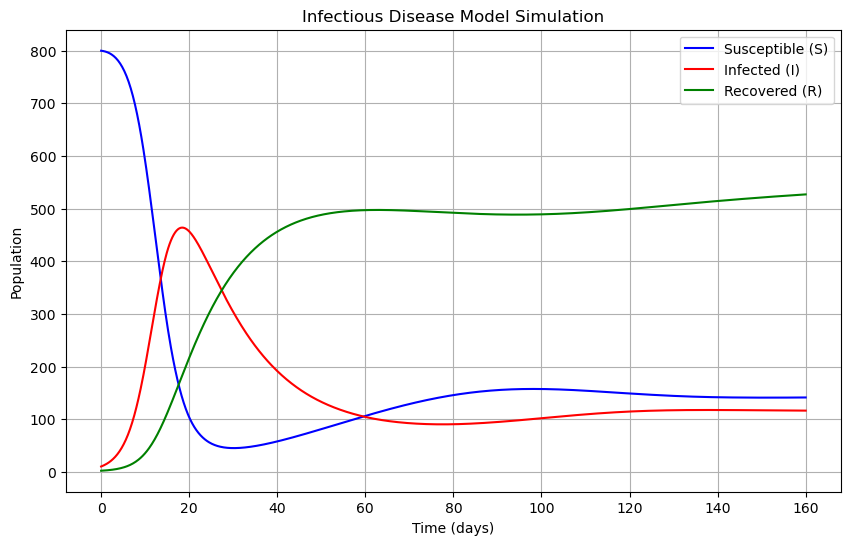

In [12]:

# Define the system of equations
def infection_model(t, y, rB, rS, rI, rR, rD):
    S, I, R = y
    dS_dt = rB + rS * R - rI * S * I
    dI_dt = rI * S * I - rR * I - rD * I
    dR_dt = rR * I - rS * R
    return [dS_dt, dI_dt, dR_dt]

# Initial conditions
S0 = 800  # initial susceptible population
I0 = 10   # initial infected population
R0 = 2    # initial recovered population
initial_conditions = [S0, I0, R0]

# Parameters (you can change these values to explore the model)
rB = 3           # birth rate
rS = 0.01        # susceptibility rate
rI = 0.0005      # infection rate
rR = 0.05        # recovery rate
rD = 0.021       # death rate

# Time span for the simulation (in days)
t_span = [0, 160]  # simulate for 160 days
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # generate 1000 time points

# Solve the system of equations
sol = solve_ivp(infection_model, t_span, initial_conditions, args=(rB, rS, rI, rR, rD), t_eval=t_eval)

# Extract the solution
S = sol.y[0]
I = sol.y[1]
R = sol.y[2]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, S, label="Susceptible (S)", color='blue')
plt.plot(sol.t, I, label="Infected (I)", color='red')
plt.plot(sol.t, R, label="Recovered (R)", color='green')
plt.title('Infectious Disease Model Simulation')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


What if the birth rates dropped to zero and noone else immigrated. Exploring what happens if nobody in the model dies:


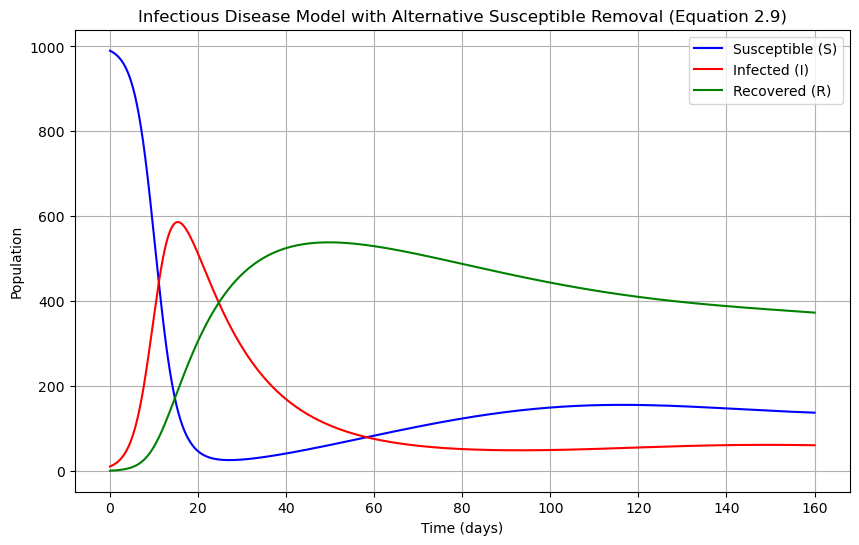

In [16]:

# Define the system of equations with the new term rA * S * A
def infection_model_with_vaccination(t, y, rB, rS, rI, rR, rD, rA, A):
    S, I, R = y
    dS_dt = rB + rS * R - rI * S * I - rA * S * A
    dI_dt = rI * S * I - rR * I - rD * I
    dR_dt = rR * I - rS * R
    return [dS_dt, dI_dt, dR_dt]

# Initial conditions
S0 = 990  # initial susceptible population
I0 = 10   # initial infected population
R0 = 0    # initial recovered population
A = 0.1   # New population affecting susceptible group (can change this)
initial_conditions = [S0, I0, R0]

# Parameters (you can change these values to explore the model)
rB = 0           # birth rate
rS = 0.01        # susceptibility rate
rI = 0.0005      # infection rate
rR = 0.05        # recovery rate
rD = 0.021       # death rate
rA = 0.0001      # rate at which susceptibles are removed due to alternative process (e.g., vaccination)

# Time span for the simulation (in days)
t_span = [0, 160]  # simulate for 160 days
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # generate 1000 time points

# Solve the system of equations
sol = solve_ivp(infection_model_with_vaccination, t_span, initial_conditions, args=(rB, rS, rI, rR, rD, rA, A), t_eval=t_eval)

# Extract the solution
S = sol.y[0]
I = sol.y[1]
R = sol.y[2]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, S, label="Susceptible (S)", color='blue')
plt.plot(sol.t, I, label="Infected (I)", color='red')
plt.plot(sol.t, R, label="Recovered (R)", color='green')
plt.title('Infectious Disease Model with Alternative Susceptible Removal (Equation 2.9)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

Updating the model so that susceptible (S) and immune (R) individuals may die from causes other than the infection. 

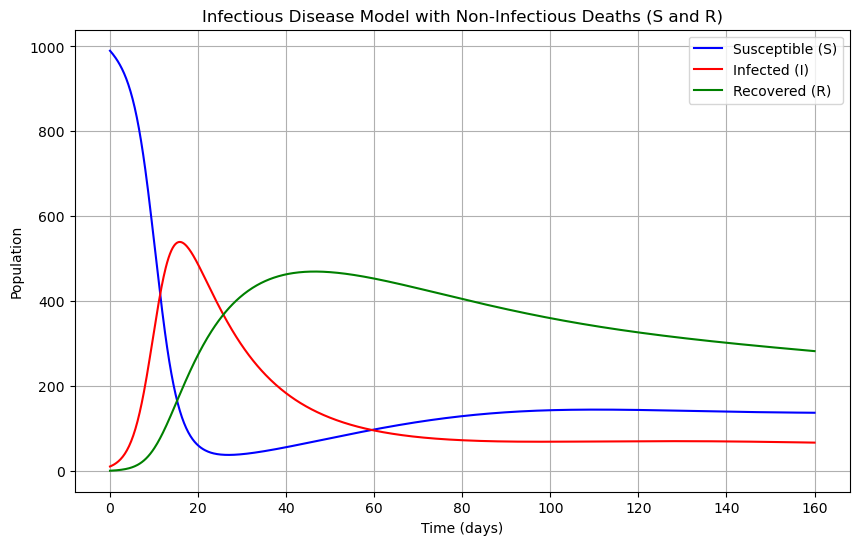

In [18]:

# Define the updated system of equations with non-infectious death rates for S and R
def infection_model_with_deaths(t, y, rB, rS, rI, rR, rD, rDS, rDR):
    S, I, R = y
    dS_dt = rB + rS * R - rI * S * I - rDS * S  # Susceptible equation with death rate rDS
    dI_dt = rI * S * I - rR * I - rD * I        # Infected equation remains the same
    dR_dt = rR * I - rS * R - rDR * R           # Recovered equation with death rate rDR
    return [dS_dt, dI_dt, dR_dt]

# Initial conditions
S0 = 990  # initial susceptible population
I0 = 10   # initial infected population
R0 = 0    # initial recovered population
initial_conditions = [S0, I0, R0]

# Parameters (you can change these values to explore the model)
rB = 3           # birth rate
rS = 0.01        # rate of losing immunity
rI = 0.0005      # infection rate
rR = 0.05        # recovery rate
rD = 0.021       # death rate from infection
rDS = 0.01       # death rate for susceptible individuals (non-infectious causes)
rDR = 0.005      # death rate for recovered individuals (non-infectious causes)

# Time span for the simulation (in days)
t_span = [0, 160]  # simulate for 160 days
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # generate 1000 time points

# Solve the system of equations
sol = solve_ivp(infection_model_with_deaths, t_span, initial_conditions, args=(rB, rS, rI, rR, rD, rDS, rDR), t_eval=t_eval)

# Extract the solution
S = sol.y[0]
I = sol.y[1]
R = sol.y[2]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, S, label="Susceptible (S)", color='blue')
plt.plot(sol.t, I, label="Infected (I)", color='red')
plt.plot(sol.t, R, label="Recovered (R)", color='green')
plt.title('Infectious Disease Model with Non-Infectious Deaths (S and R)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()



Using the same death rate for susceptible individuals and recovered individuals


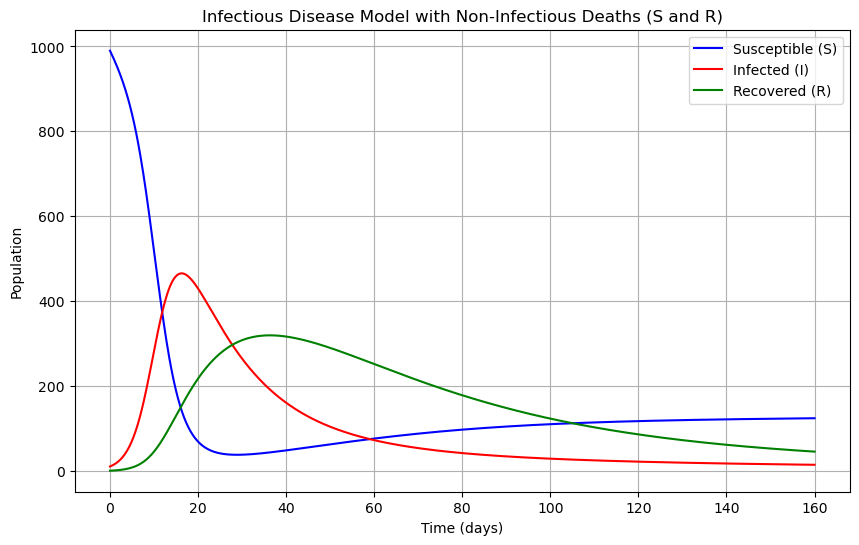

In [19]:

# Define the updated system of equations with non-infectious death rates for S and R
def infection_model_with_deaths(t, y, rB, rS, rI, rR, rD, rDS, rDR):
    S, I, R = y
    dS_dt = rB + rS * R - rI * S * I - rDS * S  # Susceptible equation with death rate rDS
    dI_dt = rI * S * I - rR * I - rD * I        # Infected equation remains the same
    dR_dt = rR * I - rS * R - rDR * R           # Recovered equation with death rate rDR
    return [dS_dt, dI_dt, dR_dt]

# Initial conditions
S0 = 990  # initial susceptible population
I0 = 10   # initial infected population
R0 = 0    # initial recovered population
initial_conditions = [S0, I0, R0]

# Parameters (you can change these values to explore the model)
rB = 3           # birth rate
rS = 0.01        # rate of losing immunity
rI = 0.0005      # infection rate
rR = 0.05        # recovery rate
rD = 0.021       # death rate from infection
rDS = 0.02       # death rate for susceptible individuals (non-infectious causes)
rDR = 0.02      # death rate for recovered individuals (non-infectious causes)

# Time span for the simulation (in days)
t_span = [0, 160]  # simulate for 160 days
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # generate 1000 time points

# Solve the system of equations
sol = solve_ivp(infection_model_with_deaths, t_span, initial_conditions, args=(rB, rS, rI, rR, rD, rDS, rDR), t_eval=t_eval)

# Extract the solution
S = sol.y[0]
I = sol.y[1]
R = sol.y[2]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, S, label="Susceptible (S)", color='blue')
plt.plot(sol.t, I, label="Infected (I)", color='red')
plt.plot(sol.t, R, label="Recovered (R)", color='green')
plt.title('Infectious Disease Model with Non-Infectious Deaths (S and R)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()



Example of an Unpredictable Deterministic Model:

Thompson and Stewart describe a very interesting system that 
can be formulated as a pair of ordinary differential equations. The 
system, called the blue sky catastrophe, is completely deterministic, 
yet can produce responses that are utterly unpredictable, unless one 
actually solves the differential equations. 
dx/dt=y
dy/dt= x- x^3 - 0.25y + A sin (t)



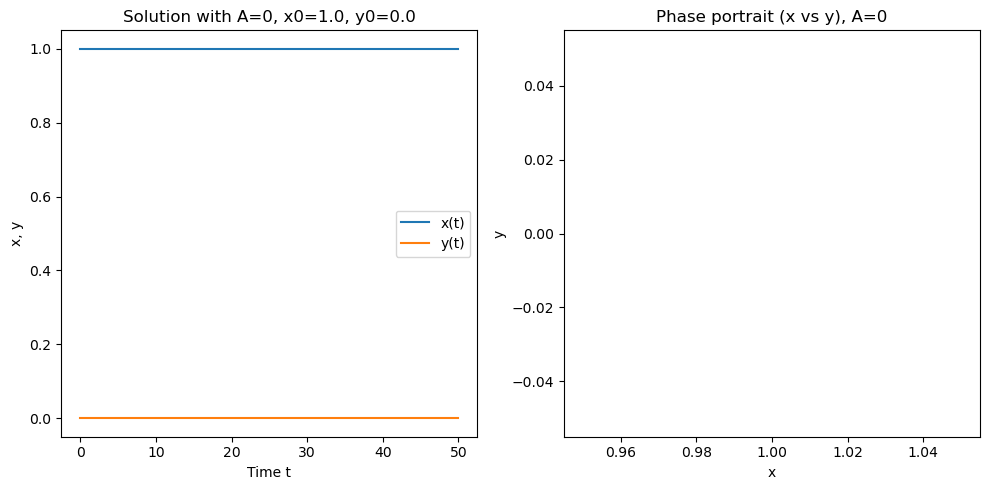

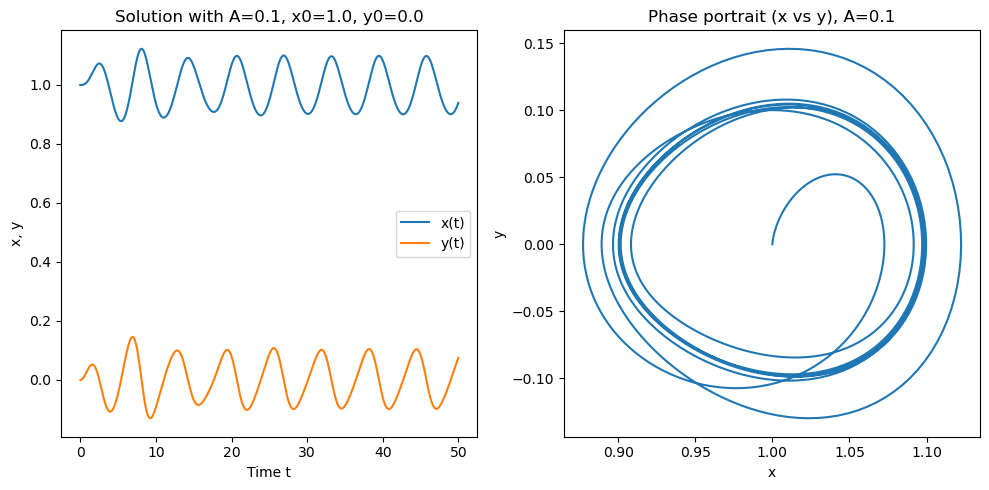

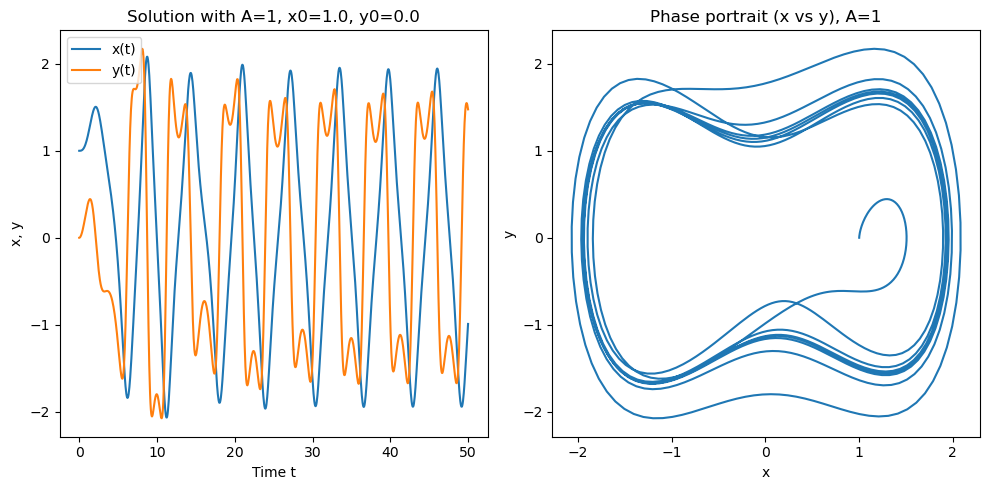

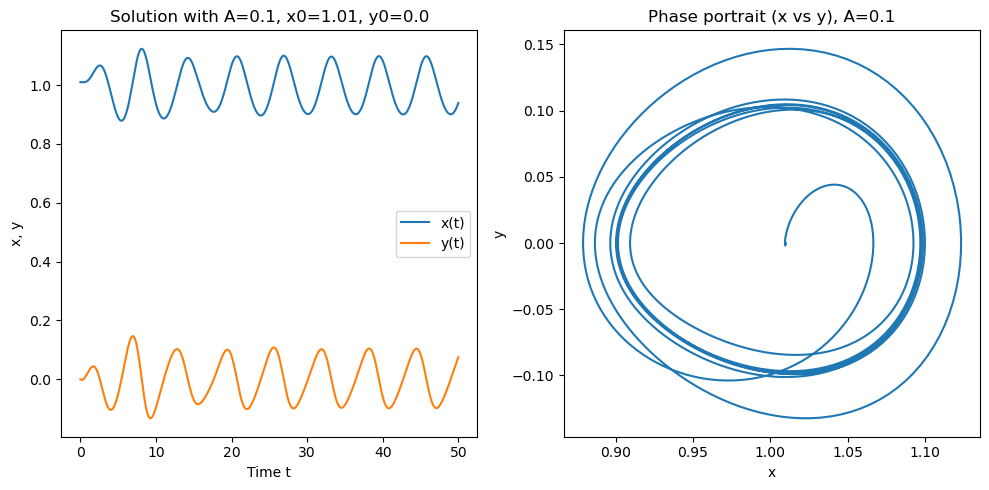

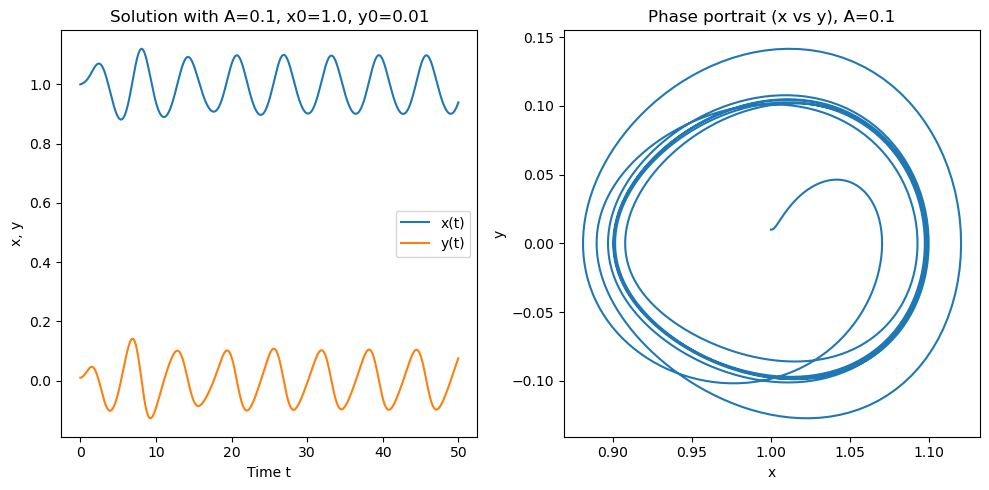

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of ODEs
def system(vars, t, A):
    x, y = vars
    dxdt = y
    dydt = x - x**3 - 0.25*y + A*np.sin(t)
    return [dxdt, dydt]

# Time points for solution
t = np.linspace(0, 50, 1000)

# Function to compute the solution and plot
def solve_system(A, x0, y0):
    # Initial conditions
    initial_conditions = [x0, y0]
    
    # Solve the system
    solution = odeint(system, initial_conditions, t, args=(A,))
    
    # Extract x and y
    x = solution[:, 0]
    y = solution[:, 1]
    
    # Plot the solution
    plt.figure(figsize=(10, 5))
    
    # Plot x and y over time
    plt.subplot(1, 2, 1)
    plt.plot(t, x, label='x(t)')
    plt.plot(t, y, label='y(t)')
    plt.title(f'Solution with A={A}, x0={x0}, y0={y0}')
    plt.xlabel('Time t')
    plt.ylabel('x, y')
    plt.legend()
    
    # Plot phase portrait (x vs y)
    plt.subplot(1, 2, 2)
    plt.plot(x, y, label='Phase portrait')
    plt.title(f'Phase portrait (x vs y), A={A}')
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.tight_layout()
    plt.show()

# Example: Explore different values of A and initial conditions
A_values = [0, 0.1, 1]
x0 = 1.0
y0 = 0.0

for A in A_values:
    solve_system(A, x0, y0)

# You can also explore different initial conditions (slightly changed)
solve_system(A=0.1, x0=1.01, y0=0.0)  # Slightly change x0
solve_system(A=0.1, x0=1.0, y0=0.01)  # Slightly change y0


The above model is hard to predict but we can see that when A=0, the system becomes autonomous, and the behavior should be more predictable, possibly leading to fixed points or periodic solutions. When AAA is nonzero, the system becomes non-autonomous, and external forcing (due to sin(t)) can introduce more complex dynamics like chaos.